In [223]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Récupération des données 



In [252]:
cancer = pd.read_csv('data/data.csv',sep=",")
cancer.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [253]:
# On a pas besoin des colonnes 'id' et 'unamed' donc on les enlève 

cancer = cancer.drop(columns=['id','Unnamed: 32'])

cancer = cancer.rename(columns={'concave points_worst':'concave_points_worst', 
                                'concave points_mean':'concave_points_mean', 
                                'concave points_se':'concave_points_se'}) # remplacer ' ' par '_' 
cancer_bf_

# Description des données 
   Informations générales sur notre dataset 'cancer'

In [254]:
features = cancer.shape[1]-1

# Taille de l'échantillon 

taille = len(cancer)

# Nombre de cas M/B

malign = len(cancer[cancer['diagnosis'] == 'M']['diagnosis'])
benign = len(cancer[data['diagnosis'] == 'B']['diagnosis'])
taux_malign = round(((float(malign)/taille))*100,2)

print("Nombre de Features : ",features)
print(str(taille) + " cas dans cet échantillon.")
print(str(features) + " features dans cet échantillon.")
print(str(malign) + " cas identifiés de type malign.")
print(str(benign) + " cas identifiés de type benign")
print("Soit " + str(taux_malign) + "% de cas de malign et " + str(100.0-taux_malign) + "% de cas de benign.")


Nombre de Features :  30
569 cas dans cet échantillon.
30 features dans cet échantillon.
212 cas identifiés de type malign.
357 cas identifiés de type benign
Soit 37.26% de cas de malign et 62.74% de cas de benign.


# Séléction des features importantes

On a beaucoup de features (31 sans 'diagnosis') donc il faut essayer de trouver des corrélations, et essayer de diminuer ce nombre. Des techniques connues sont l'utilisation de la méthode Wrapper pour la sélection de features, puis faire l'intersection avec Feature Importance et Lasso.

In [257]:
# On commence par enlever la colonne 'diagnosis'

diag = cancer['diagnosis']
features = cancer.drop('diagnosis',axis=1,inplace=True)
print("Dataset shape : ",cancer.shape)

Dataset shape :  (569, 30)


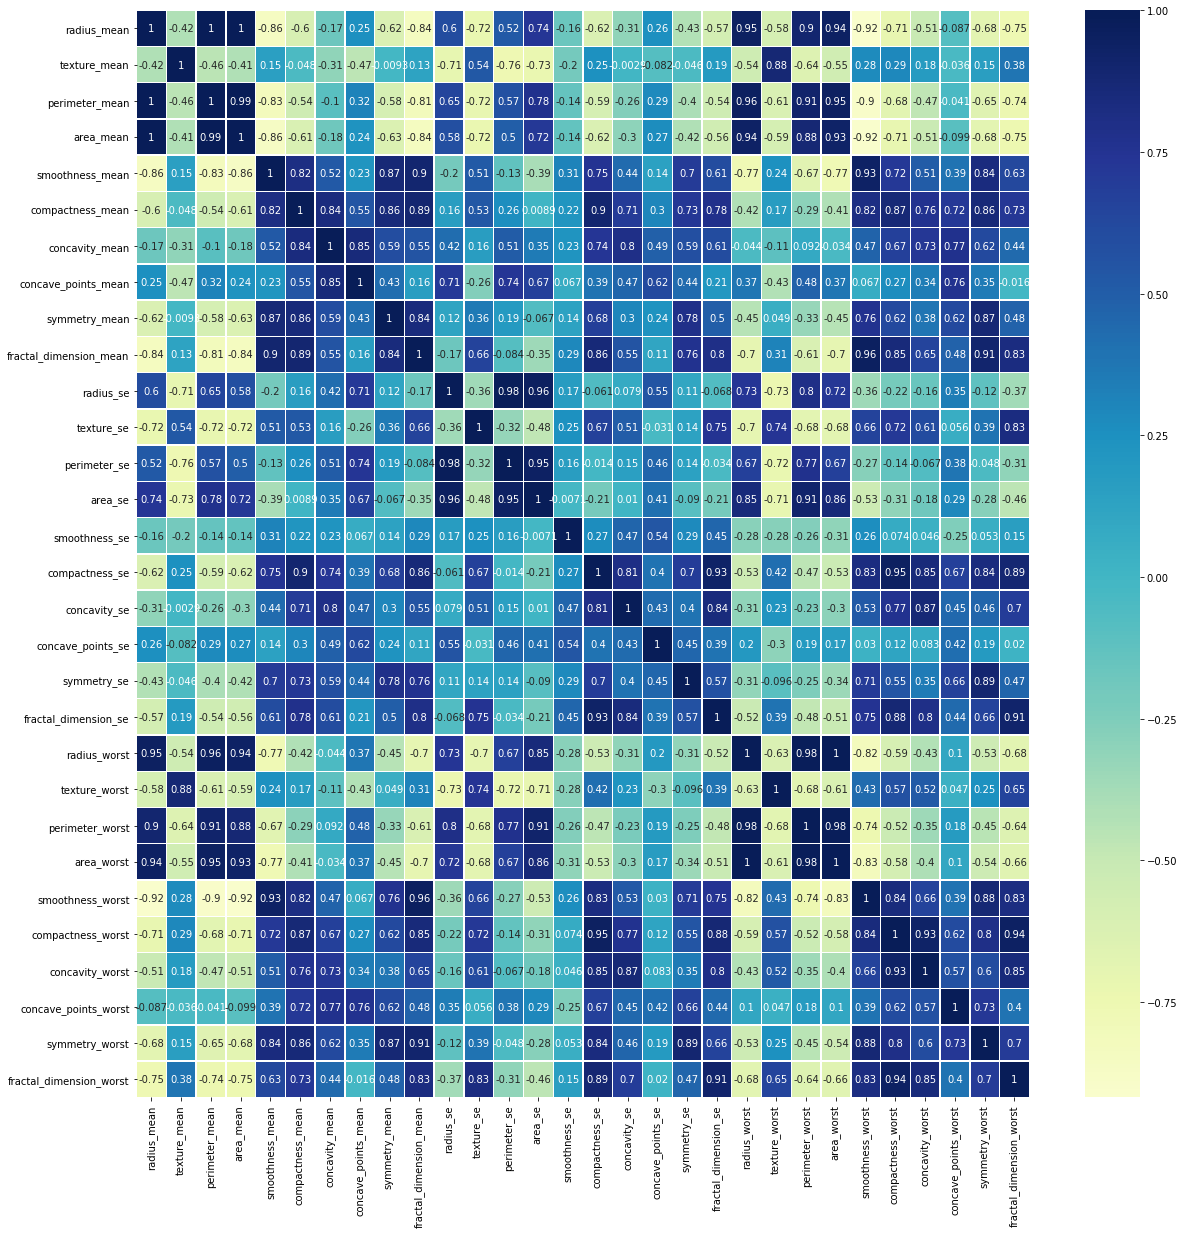

In [266]:
#
import seaborn as sns

# On prend le top 10 des colonnes

cancer_top10 = cancer.head(10)
plt.figure(figsize=(20,20))
sns.heatmap(cancer_top10.corr(),
            annot=True,
            linewidths=.4,
            center=0,
            cmap="YlGnBu")
plt.show()